*****************
Import Statements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
import warnings
import numpy as np
import matplotlib.pyplot as plt

****
Step 1: read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

In [2]:
#Standardizing values 
df = pd.read_csv('Titanic.csv')
df = df[['pclass', 'sex', 'age','sibsp','survived']] 
df['pclass'] = df['pclass'].map({'1st':1,'2nd':2,'3rd':3})
df['sex'] = df['sex'].map({'male':0,'female':1})
df['age'].fillna((df['age'].mean()),inplace=True)
df = df.dropna()
df.head()

,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


In [3]:
#Data Split
X = df.drop('survived',axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

****
Step 2: fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

In [4]:
#Decision Tree 
dt = DecisionTreeClassifier()

dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test, y_pred))

print("Accuracy: ",accuracy_score(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.78      0.87      0.82       232
           1       0.77      0.65      0.71       161

    accuracy                           0.78       393
   macro avg       0.78      0.76      0.76       393
weighted avg       0.78      0.78      0.77       393

Accuracy:  0.7786259541984732


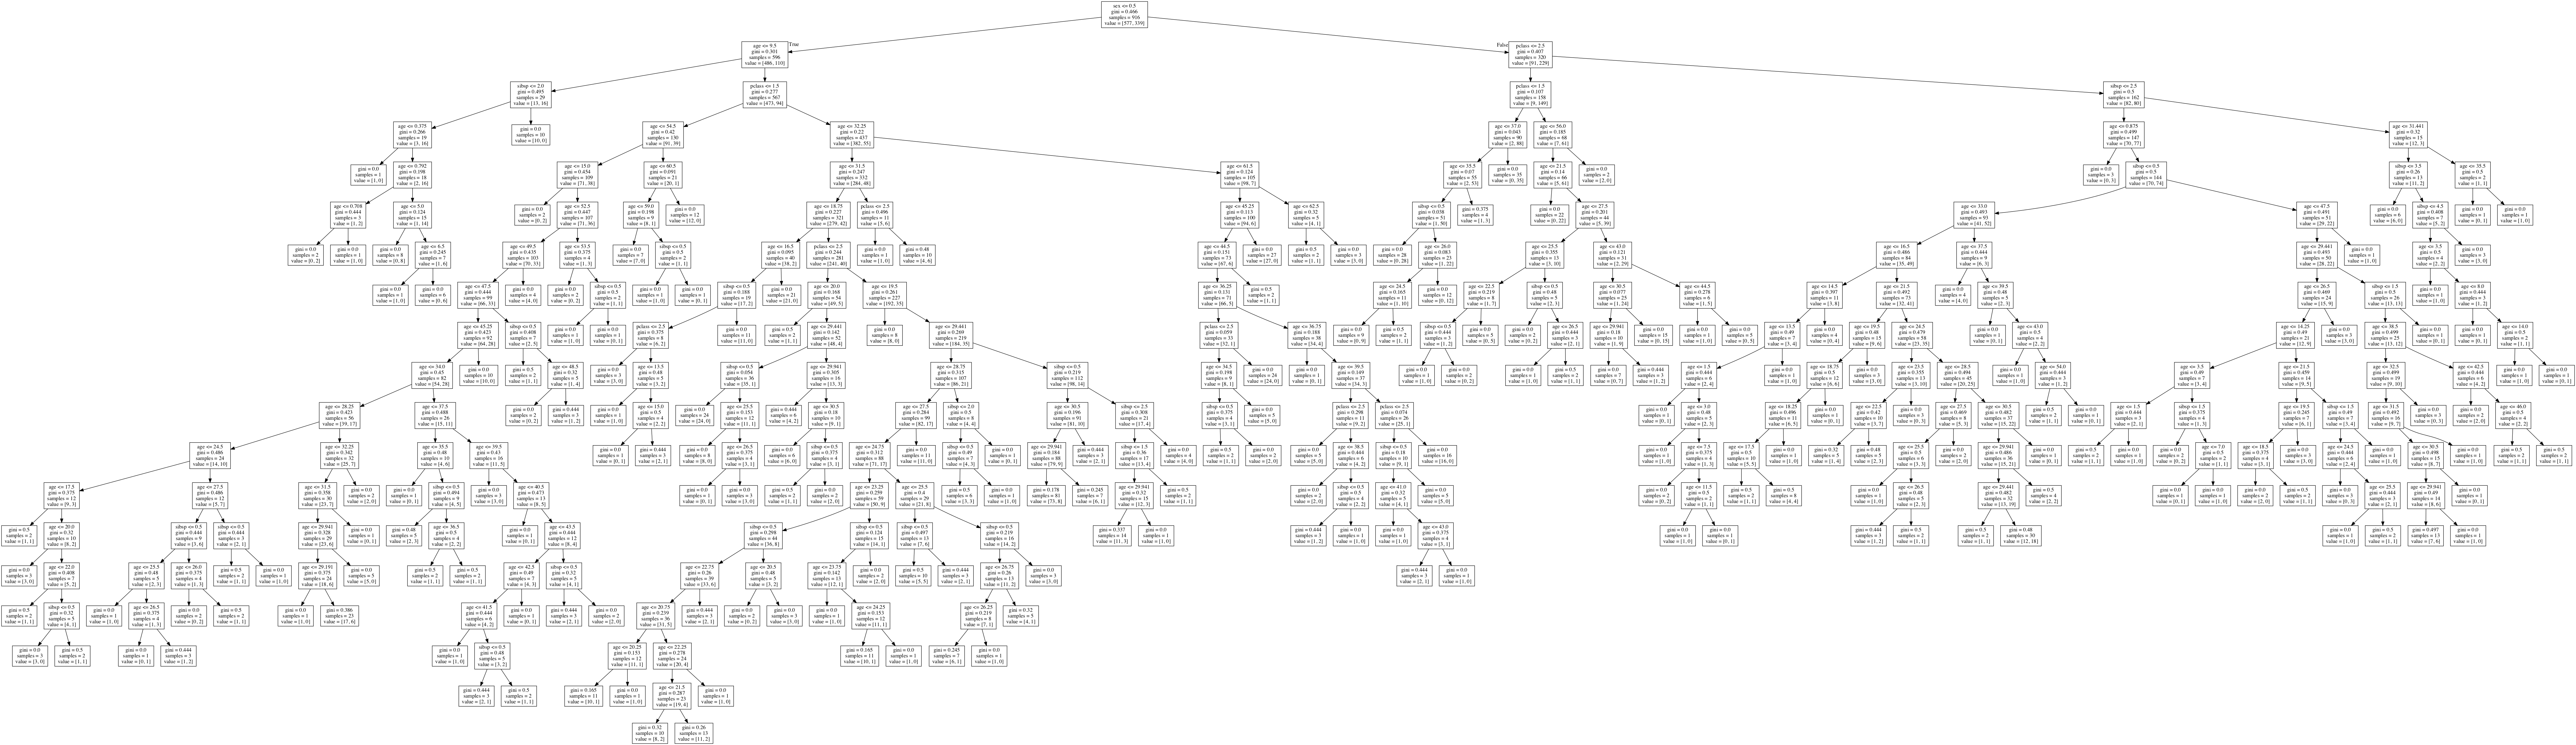

In [5]:
#Plotting Decision Tree
data = export_graphviz(dt, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

****
Step 3: print out the performance measures of the full model: in‐sample and out-of‐sample accuracy, defined as following:<br><br>
in‐sample percent survivors correctly predicted (on training set)<br>
in-sample percent fatalities correctly predicted (on training set) <br>
out‐of‐sample percent survivors correctly predicted (on test set) <br>
out-of‐sample percent fatalities correctly predicted (on test set)

In [6]:
y_pred_new = dt.predict(X_train)

#For training set
conf_matrix = confusion_matrix(y_train, y_pred_new)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_train = TP/(TP+FN)
specificity_train = TN/(FP+TN)

#for testing set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("in‐sample percent survivors correctly predicted (on training set) : {0:.2f}%\n".format(sensitivity_train*100))
print("in‐sample percent fatalities correctly predicted (on training set) : {0:.2f}%\n".format(specificity_train*100))
print("out‐of‐sample percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("out-of‐sample percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))

in‐sample percent survivors correctly predicted (on training set) : 76.11%

in‐sample percent fatalities correctly predicted (on training set) : 95.32%

out‐of‐sample percent survivors correctly predicted (on testing set) : 65.22%

out-of‐sample percent fatalities correctly predicted (on testing set) : 86.64%



***
Step 4: use cross‐validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. Find the minimum number of misclassification and choose the corresponding tree size to prune the tree. 

In [7]:
#Finding best parameters

warnings.filterwarnings("ignore")
tuned_parameters = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11],
}

clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=tuned_parameters,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    
print()
print("Detailed classification report:")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'criterion': 'gini', 'max_leaf_nodes': 8}

Grid scores on development set:

0.781 (+/-0.072) for {'criterion': 'gini', 'max_leaf_nodes': 2}
0.774 (+/-0.075) for {'criterion': 'gini', 'max_leaf_nodes': 3}
0.774 (+/-0.076) for {'criterion': 'gini', 'max_leaf_nodes': 4}
0.785 (+/-0.067) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.785 (+/-0.067) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.785 (+/-0.066) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.796 (+/-0.070) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.793 (+/-0.073) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.782 (+/-0.073) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.782 (+/-0.073) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.781 (+/-0.072) for {'criterion': 'entropy', 'max_leaf_nodes': 2}
0.774 (+/-0.075) for {'criterion': 'entropy', 'max_leaf_nodes': 3}
0.773 (+/-0.076) for {'criterion': 'entropy', 'max_leaf_nodes': 4}
0.781 (+/-0.070) for {'criterion'

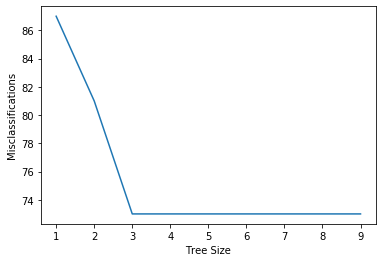

In [8]:
#Plotting a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis

max_depth=[1,2,3,4,5,6,7,8,9]
misclassification = []

for depth in max_depth:
    
    clf = DecisionTreeClassifier(max_depth=depth,max_leaf_nodes=8,min_samples_split=9)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    misclassified = np.where(y_test != y_pred)

    miss = []
    for item in misclassified:
        miss.extend(item)
    misclassification += [len(miss)]       

plt.plot(max_depth,misclassification)
plt.xlabel('Tree Size')
plt.ylabel('Misclassifications')
plt.show()

Based on the graph plotted, we take max_depth = 3

***
Step 5: prune the tree with the optimal tree size. Plot the pruned tree.

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       232
           1       0.80      0.73      0.76       161

    accuracy                           0.81       393
   macro avg       0.81      0.80      0.81       393
weighted avg       0.81      0.81      0.81       393



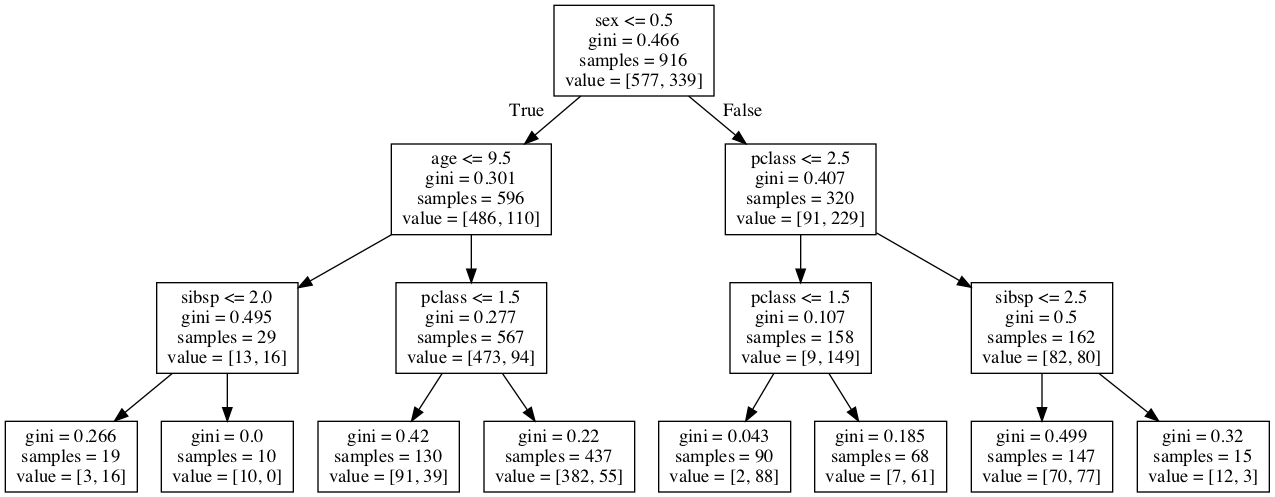

In [9]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

data = export_graphviz(clf, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

***
Step 6: For the final pruned tree, report its in‐sample and out‐of‐sample accuracy, defined as<br>
in‐sample percent survivors correctly predicted (on training set)<br> in‐sample percent fatalities correctly predicted (on training set)<br> out‐of‐sample percent survivors correctly predicted (on test set)<br> out‐of‐sample percent fatalities correctly predicted (on test set)<br>
Check whether there is improvement in out‐of‐sample for the full tree (bigger model) and the pruned tree (smaller model).

In [10]:
y_pred_new = clf.predict(X_train)

#For training set
conf_matrix = confusion_matrix(y_train, y_pred_new)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_train = TP/(TP+FN)
specificity_train = TN/(FP+TN)

#for testing set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("in‐sample percent survivors correctly predicted (on training set) : {0:.2f}%\n".format(sensitivity_train*100))
print("in‐sample percent fatalities correctly predicted (on training set) : {0:.2f}%\n".format(specificity_train*100))
print("out‐of‐sample percent survivors correctly predicted (on testing set) : {0:.2f}%\n".format(sensitivity_test*100))
print("out-of‐sample percent fatalities correctly predicted (on testing set) : {0:.2f}%\n".format(specificity_test*100))

in‐sample percent survivors correctly predicted (on training set) : 71.91%

in‐sample percent fatalities correctly predicted (on training set) : 85.00%

out‐of‐sample percent survivors correctly predicted (on testing set) : 74.31%

out-of‐sample percent fatalities correctly predicted (on testing set) : 87.55%



***
out‐of‐sample percent survivors correctly predicted (on testing set) for full tree : 68.06%<br>
out‐of‐sample percent survivors correctly predicted (on testing set) for pruned tree : 74.31%<br>

out-of‐sample percent fatalities correctly predicted (on testing set) for full tree : 84.74%<br>
out-of‐sample percent fatalities correctly predicted (on testing set) for pruned tree : 87.55%